## Welcome, here is my Python code in a concentrated sheet

First of all, import all the necessary packages and libraries

In [1]:
# Read the csv files
import pandas as pd
import numpy as np

# from datetime import datetime
# Visual my data with the following
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import squarify


 - Import all the relevat csv files for this question

In [2]:
circuits = pd.read_csv('archive/circuits.csv')
race = pd.read_csv('archive/races.csv', parse_dates=['date'])
status = pd.read_csv('archive/status.csv')
result = pd.read_csv('archive/results.csv')
world = pd.read_csv('countries.csv')
constructors = pd.read_csv('archive/constructors.csv')
drivers = pd.read_csv('archive/drivers.csv', parse_dates=['dob'])
sprint = pd.read_csv('archive/sprint_results.csv')
qualifying = pd.read_csv('archive/qualifying.csv')

# Drivers Points

In [3]:
# convert the nationality column to the countries names
nationality_to_country = {
    'British': 'UK',
    'German': 'Germany',
    'Spanish': 'Spain',
    'Finnish': 'Finland',
    'Japanese': 'Japan',
    'French': 'France',
    'Polish': 'Poland',
    'Brazilian': 'Brazil',
    'Italian': 'Italy',
    'Australian': 'Australia',
    'Austrian': 'Austria',
    'American': 'USA',
    'Dutch': 'Netherlands',
    'Colombian': 'Colombia',
    'Portuguese': 'Portugal',
    'Canadian': 'Canada',
    'Indian': 'India',
    'Hungarian': 'Hungary',
    'Irish': 'Ireland',
    'Danish': 'Denmark',
    'Argentine': 'Argentina',
    'Czech': 'Czech Republic',
    'Malaysian': 'Malaysia',
    'Swiss': 'Switzerland',
    'Belgian': 'Belgium',
    'Monegasque': 'Monaco',
    'Swedish': 'Sweden',
    'Venezuelan': 'Venezuela',
    'New Zealander': 'New Zealand',
    'Chilean': 'Chile',
    'Mexican': 'Mexico',
    'South African': 'South Africa',
    'Liechtensteiner': 'Liechtenstein',
    'Rhodesian': 'Zimbabwe',  # Rhodesia is now Zimbabwe
    'American-Italian': 'United States/Italy',  # Dual nationality, interpretative
    'Uruguayan': 'Uruguay',
    'Argentine-Italian': 'Argentina/Italy',  # Dual nationality, interpretative
    'Thai': 'Thailand',
    'East German': 'Germany',  # East Germany has since reunified with Germany
    'Russian': 'Russia',
    'Indonesian': 'Indonesia',
    'Chinese': 'China'
}

drivers['country'] = drivers['nationality'].map(nationality_to_country)

# A dictionary with the right names for later, so I can replace the countries names
replacments = {'United Kingdom':'UK', 
               'United States':'USA',
               'United Arab Emirates': 'UAE',
               'South Korea': 'Korea'}

# rename the country and continent to lowercase merge the right column name (from world DF)
world = world.rename(columns={'Country': 'country', 'Continent': 'continent'})

# replace the country name to a shorter version using the dictionary above
drivers['country'] = drivers['country'].replace(replacments)


In [4]:
# I choose only a few columns, otherwise I'll have too many
d_result = result[['driverId', 'points', 'resultId','raceId']]
d_driver = drivers[['driverId', 'forename', 'surname' ,'country']]
d_race = race[['raceId', 'year']]
# Merging the short version of my DF
championship = pd.merge(d_driver, d_result, on='driverId')
champ = pd.merge(championship, d_race, on='raceId')
champ.head()

,driverId,forename,surname,country,points,resultId,raceId,year
0,1,Lewis,Hamilton,UK,10.0,1,18,2008
1,2,Nick,Heidfeld,Germany,8.0,2,18,2008
2,3,Nico,Rosberg,Germany,6.0,3,18,2008
3,4,Fernando,Alonso,Spain,5.0,4,18,2008
4,5,Heikki,Kovalainen,Finland,4.0,5,18,2008


In [5]:
# By changing the year below, you can see how many points each driver get
late = champ.loc[champ['year'] == 2021] #running on each row related to a year and give bake only clean one year of data
# The following line group the total points that each driver get in the year you choose and sort it from top to bottom
late.groupby(['forename','surname'])[['points']].sum().reset_index().sort_values(by='points', ascending=False)

,forename,surname,points
11,Max,Verstappen,388.5
10,Lewis,Hamilton,385.5
19,Valtteri,Bottas,219.0
18,Sergio,Pérez,190.0
1,Carlos,Sainz,163.5
9,Lando,Norris,160.0
2,Charles,Leclerc,159.0
3,Daniel,Ricciardo,114.0
15,Pierre,Gasly,110.0
5,Fernando,Alonso,81.0


In [6]:
# Calculate the total number of points each driver get in every year to measure who was the winner that year.
years = champ['year'].unique()
champions = {}
for year in years:
    # Filter data for the current year
    data_year = champ.loc[champ['year'] == year]
    # display(data_year)    
    # Group by surname, sum the points, and sort
    driver_points = data_year.groupby(['driverId'])[['points']].sum().reset_index().sort_values(by='points', ascending=False)
    # display(driver_points)    
    # Select the champion (top driver)
    champion = driver_points.iloc[0]
    # display(champion)    
    # Store the champion in the dictionary
    # display(drivers.loc[drivers['driverId'] == champion['driverId']])
    champions[year] = drivers.loc[drivers['driverId'] == champion['driverId']].country.values[0] #champion['driverId']#+ ', ' + champion['forename'] + ' ' + champion['surname']
    # print(champions)
# Convert the champions dictionary to a DataFrame for nicer display if desired
champions_df = pd.DataFrame(list(champions.items()), columns=['Year', 'Champion']).sort_values(by='Year')
champions_df = champions_df['Champion'].value_counts().reset_index()

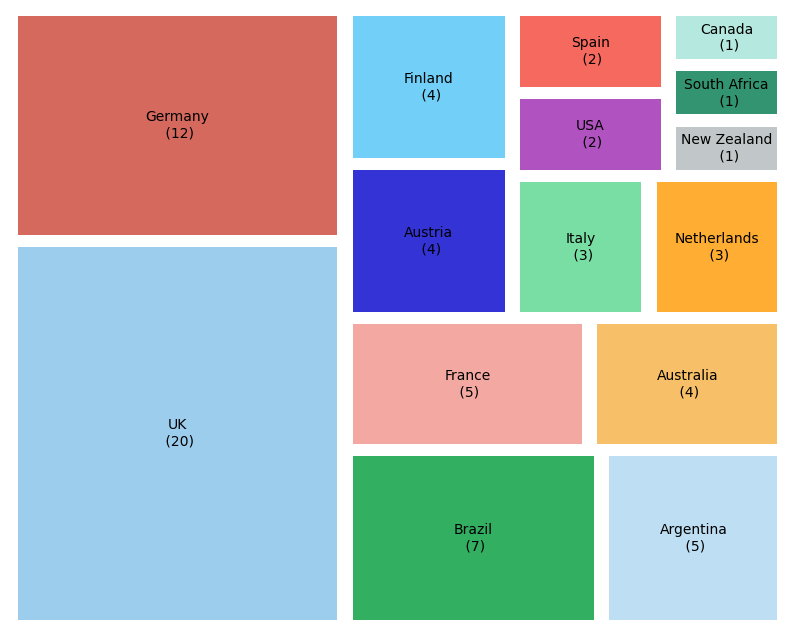

In [7]:
import squarify # Use this library for the visual in the presentation
# Define your colors for the rectangles
colors=['#85C1E9','#CB4335','#009B3A','#AED6F1','#F1948A',
        '#F5B041','#0000CC','#4FC3F7','#58D68D','#FF9900',
        '#9C27B0','#F44336','#B2BABB','#007A4D','#A3E4D7']

# Create a figure to plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Create a squarify plot without the labels
squarify.plot(sizes=champions_df['count'],alpha=.8, color=colors, pad=True)

# Add labels manually with custom font properties
for rect, (label, count) in zip(ax.patches, zip(champions_df['Champion'], champions_df['count'])):
    x, y, dx, dy = rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()
    label_text = f"{label}\n ({count})"  # Format the label with the count
    ax.text(x+dx/2, y+dy/2, label_text,
            va='center', ha='center',  # center alignment
            color='black',             # white font color for visibility
            fontname='sans-serif',     # font
            fontsize=10)               # size of the font

# Display the plot
plt.axis('off')
plt.show()

In [8]:
# # USA only
# import squarify
# colors=['#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7',
#         '#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7',
#         '#9C27B0','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7']

# # Create a figure to plot
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111)

# # Create a squarify plot without the labels
# squarify.plot(sizes=champions_df['count'],alpha=.8, color=colors, pad=True)

# # Add labels manually with custom font properties
# for rect, (label, count) in zip(ax.patches, zip(champions_df['Champion'], champions_df['count'])):
#     x, y, dx, dy = rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()
#     label_text = f"{label}\n ({count})"  # Format the label with the count
#     ax.text(x+dx/2, y+dy/2, label_text,
#             va='center', ha='center',  # center alignment
#             color='black',             # white font color for visibility
#             fontname='sans-serif',     # font
#             fontsize=10)               # size of the font

# # Display the plot
# plt.axis('off')
# plt.show()

In [9]:
# Running this line will group my drivers table by the points so I can have the total point in a fast way.

champ.groupby(['country'])['points'].sum().reset_index().sort_values(by='points', ascending=False).nlargest(3, 'points')


,country,points
35,UK,10868.64
14,Germany,7952.50
12,Finland,4383.50


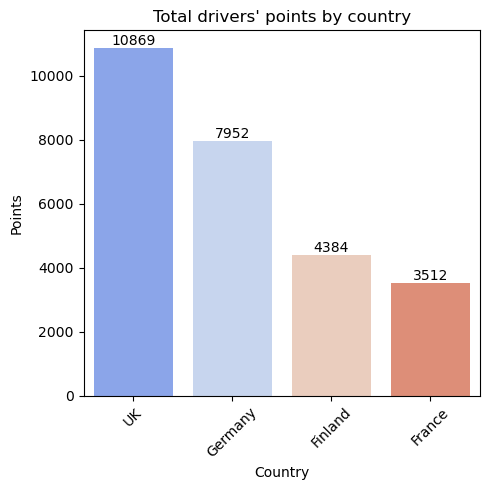

In [11]:
# Create a fast DataFrame for the drivers to sum all the drivers points, sort and show in bar plot
data = champ.groupby(['country'])['points'].sum().reset_index().sort_values(by='points', ascending=False).nlargest(4, 'points')
plt.figure(figsize=(5, 5))  # Set the figure size as needed
 
ax = sns.barplot(x=data['country'], y=data['points'] ,palette="coolwarm")

# I use this 'for' loop to add the number on each bar for better understanding on the number
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title("Total drivers' points by country")
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

# Podiums

- Not every race has all the positions, but the top 3 were always there.\
 here is my way to get the top three drivers from each race

In [11]:

result['position'] = pd.to_numeric(result['position'], errors='coerce')
# Filtering using query after ensuring 'position' is of integer type
podium = result.query('position == 1 | position == 2 | position == 3')

In [12]:
winners = pd.merge(podium, drivers, on='driverId')

In [13]:
winner_s = winners[['raceId','forename', 'surname', 'nationality','driverId','position']]
podium_d_tp = winner_s.groupby(['nationality', 'position'])['driverId'].count().reset_index().sort_values(by='position', ascending=False)
podium_d_tp.head()

,nationality,position,driverId
55,Polish,3.0,6
17,Brazilian,3.0,89
62,South African,3.0,10
33,Finnish,3.0,97
39,German,3.0,109


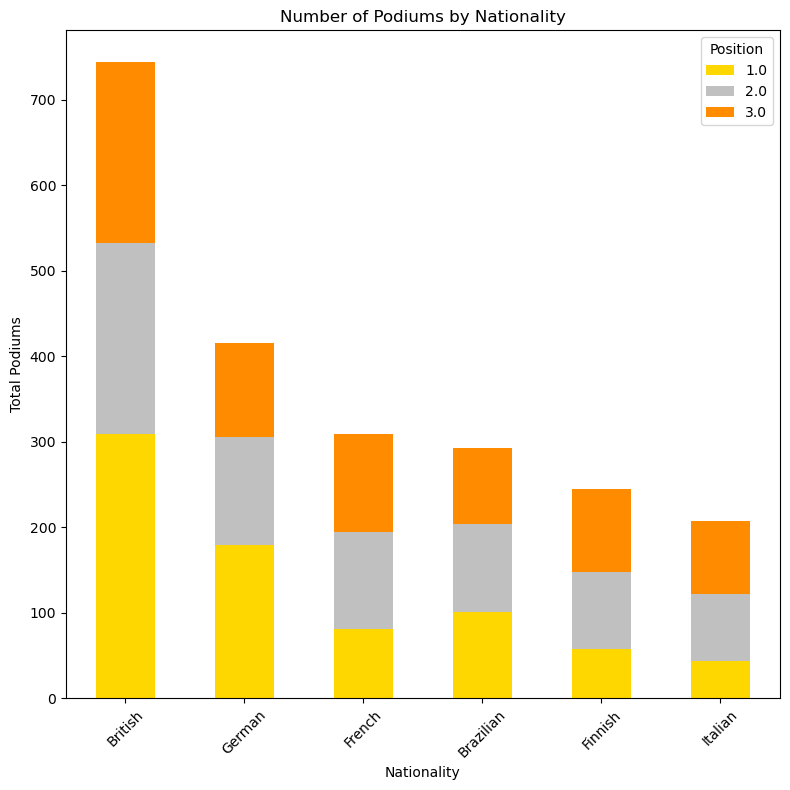

In [14]:
colors = ['gold', 'silver', 'darkorange']
          
pivot_pod = podium_d_tp.pivot(index='nationality', columns='position', values='driverId').fillna(0)
pivot_pod['total'] = pivot_pod.sum(axis=1)
sorted_pivot_pod_d = pivot_pod.sort_values(by='total', ascending=False) #sort the total country podiums
sorted_pivot_pod_d = sorted_pivot_pod_d.nlargest(6,'total').drop(columns=['total']) #drop the column
sorted_pivot_pod_d.plot(kind='bar', stacked=True, figsize=(8, 8), color=colors)

plt.title('Number of Podiums by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Total Podiums')
plt.xticks(rotation=45)  # Rotate the country names for better readability
plt.legend(title='Position')
plt.tight_layout()
plt.show()

# total constructors poins by country

In [15]:
# - Taking care of constructors data, changing nationality to countries names - #

# convert the nationality no country name
nationality_to_country = {
    'British': 'United Kingdom',
    'German': 'Germany',
    'French': 'France',
    'Italian': 'Italy',
    'Japanese': 'Japan',
    'Austrian': 'Austria',
    'Indian': 'India',
    'Dutch': 'Netherlands',
    'Russian': 'Russia',
    'Swiss': 'Switzerland',
    'Irish': 'Ireland',
    'Hong Kong': 'Hong Kong',  # Special Administrative Region of China
    'Brazilian': 'Brazil',
    'Canadian': 'Canada',
    'Mexican': 'Mexico',
    'American': 'United States',
    'Australian': 'Australia',
    'New Zealander': 'New Zealand',
    'South African': 'South Africa',
    'Rhodesian': 'Zimbabwe',  # Rhodesia is now Zimbabwe
    'Belgian': 'Belgium',
    'East German': 'Germany',  # East Germany is now part of Germany
    'Spanish': 'Spain',
    'Malaysian': 'Malaysia'
}
constructors['country'] = constructors['nationality'].map(nationality_to_country)
world = world.rename(columns={'Country': 'country', 'Continent': 'continent'})
constructors['country'] = constructors['country'].replace(replacments)
constructors.head()

,constructorId,constructorRef,name,nationality,url,country
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,UK
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Germany
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,UK
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,France
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,Italy


In [16]:
r_result = result[['constructorId', 'points', 'driverId','raceId', 'resultId']]
c_constructors = constructors[['constructorId', 'name', 'country']]
merged_constructors_and_result = pd.merge(c_constructors, r_result, on='constructorId')
merged_constructors_and_result.head(2)

,constructorId,name,country,points,driverId,raceId,resultId
0,1,McLaren,UK,10.0,1,18,1
1,1,McLaren,UK,4.0,5,18,5


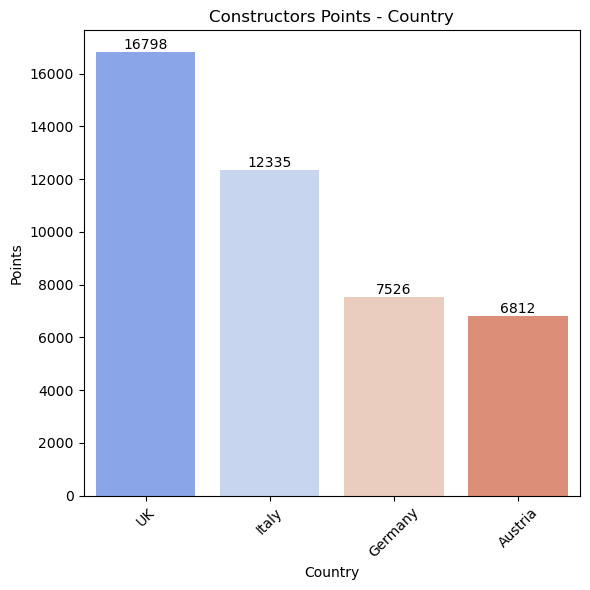

In [17]:
total_point_const = merged_constructors_and_result.groupby('country')['points'].sum().round()
total_point_const = total_point_const.sort_values(ascending=False).nlargest(4)
# colors=['#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#9C27B0','#BDC3C7']
plt.figure(figsize=(6, 6))  # Set the figure size as needed

ax = sns.barplot(x=total_point_const.index, 
                 y=total_point_const.values,
                 palette='coolwarm')

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Constructors Points - Country')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [18]:
constructors_countries = constructors.groupby('country')['name'].count().reset_index().sort_values(by='name', ascending=False)
constructors_countries = constructors_countries.rename(columns={'name': 'num_of_constructors'}).nlargest(5, 'num_of_constructors')
constructors_countries

,country,num_of_constructors
20,UK,86
21,USA,39
10,Italy,29
5,France,13
6,Germany,11


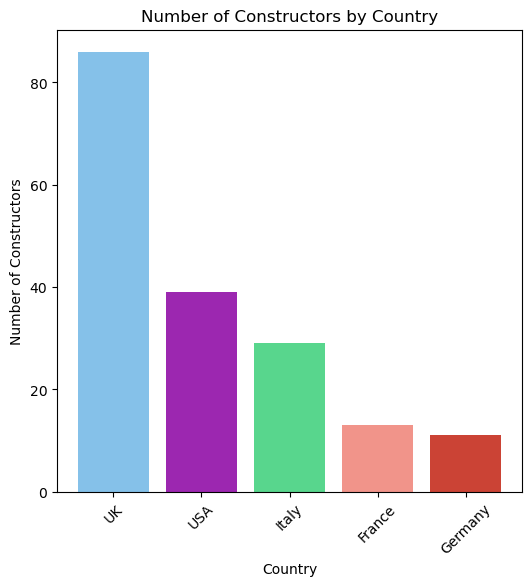

In [19]:
# Create a bar plot
colors=['#85C1E9','#9C27B0','#58D68D','#F1948A','#CB4335']
plt.figure(figsize=(6, 6))  # Set the figure size as desired
plt.bar(x=constructors_countries['country'], height=constructors_countries['num_of_constructors'],color=colors)

# Adding titles and labels
plt.title('Number of Constructors by Country')
plt.xlabel('Country')
plt.ylabel('Number of Constructors')
plt.xticks(rotation=45)  # Rotate the country names for better readability
# Show the plot
plt.show()